In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv("USArrests.csv", index_col = "Unnamed: 0")
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [76]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [14]:
# df = df.drop("Unnamed: 0", axis =1)

In [77]:
# !pip install pyclustertend
from pyclustertend import hopkins

In [78]:
hopkins(df, df.shape[0])  # 0.5 e meyilli

0.4214426098800901

In [79]:
from sklearn.preprocessing import scale

hopkins(scale(df), df.shape[0])  # bu sekilde de scale edilebilir

0.3909393653069462

In [80]:
# KMeans

In [81]:
k_means = KMeans(n_clusters = 2).fit(df)

In [82]:
clusters = k_means.labels_

In [83]:
clusters

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

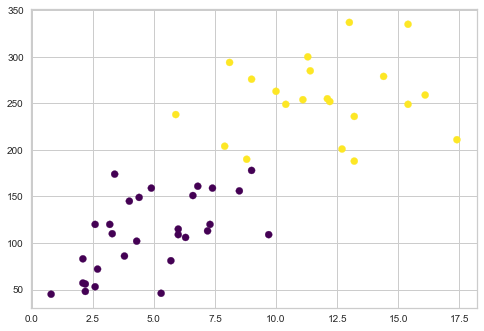

In [84]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis")

In [85]:
centroids = k_means.cluster_centers_
centroids

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

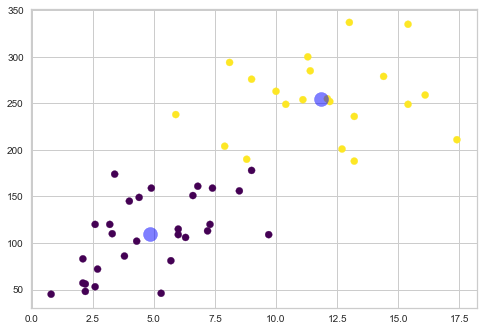

In [86]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis")
plt.scatter(centroids[:,0], centroids[:,1], c = "blue", s = 200, alpha=0.5)

# define K : Elbow Methode:

In [87]:
ssd = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df))
    ssd.append(kmeans.inertia_)

Text(0.5, 1.0, 'Inertia')

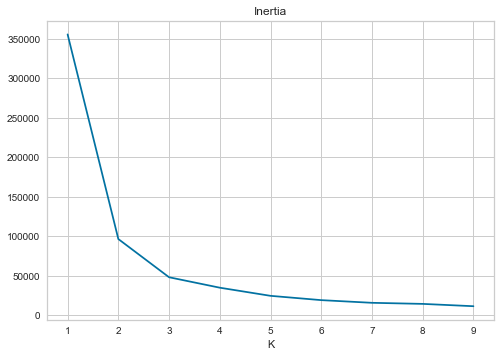

In [89]:
plt.plot(K, ssd, "bx-")
plt.xlabel("K")
plt.title("Inertia")

In [57]:
# !pip install yellowbrick

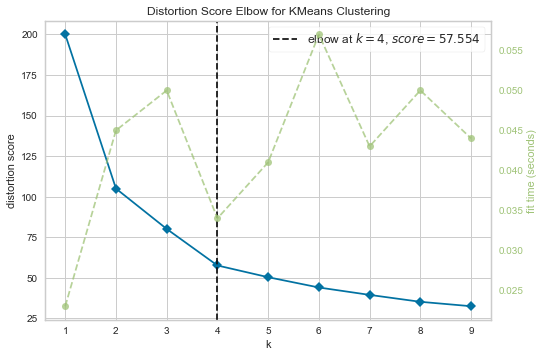

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [90]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (1,10))
visu.fit(scale(df))
visu.poof()

In [91]:
 kmeans = KMeans(n_clusters = 4).fit((df))

In [92]:
labels = kmeans.labels_

In [93]:
labels

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 1, 2, 1,
       3, 1, 2, 0, 0, 1, 3, 2, 1, 1, 1, 3, 0, 2, 2, 0, 2, 1, 3, 2, 2, 0,
       3, 2, 2, 3, 3, 2])

In [94]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [95]:
df["cluster_id"] = labels

In [97]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster_id
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [17]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [99]:
print(f'Silhouette Score(n=4): {silhouette_score(df, labels)}')

Silhouette Score(n=4): 0.5017308871399259


#### silüet puanı 1 e yakın olması lazım o zaman kümeler birbirinden olduğunca uzak
#### küme uyumunun da bir ölçütü
#### neye göre hesaplanıyor? = bir veri noktası bir kümeye atanıyor
#### 2 faktöre göre değerlendirme yapılıyor
#### 1.faktör = diğer küme elemanlarrıyla ne kadar yakın
#### 2. faktör = veri noktam diğer kümelerdeki noktalara uzaklığı ne kadar

#### intra cluster içi;
#### inter clusterlar arası

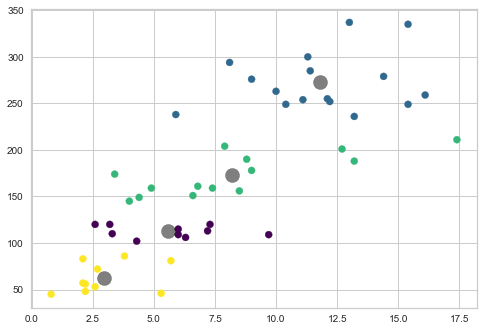

In [100]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = labels, s = 50, cmap = "viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black',alpha=0.5, label = 'Centroids')

## ARI Score
### RI = (number of agreeing pairs) / (number of pairs)
### A = Adjusted
### ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)

In [102]:
new_df = df.sample(15)

In [106]:
new_df

,Murder,Assault,UrbanPop,Rape,cluster_id,true_label
Hawaii,5.3,46,83,20.2,3,0
New Hampshire,2.1,57,56,9.5,3,1
Louisiana,15.4,249,66,22.2,1,3
Indiana,7.2,113,65,21.0,0,1
Nevada,12.2,252,81,46.0,1,0
Delaware,5.9,238,72,15.8,1,0
Massachusetts,4.4,149,85,16.3,2,2
North Dakota,0.8,45,44,7.3,3,3
New York,11.1,254,86,26.1,1,1
Colorado,7.9,204,78,38.7,2,3


In [107]:
new_df["true_label"] = [0, 1, 3, 1, 0, 0, 2, 3, 1, 3, 3, 0, 1, 1, 2]

In [108]:
new_df

,Murder,Assault,UrbanPop,Rape,cluster_id,true_label
Hawaii,5.3,46,83,20.2,3,0
New Hampshire,2.1,57,56,9.5,3,1
Louisiana,15.4,249,66,22.2,1,3
Indiana,7.2,113,65,21.0,0,1
Nevada,12.2,252,81,46.0,1,0
Delaware,5.9,238,72,15.8,1,0
Massachusetts,4.4,149,85,16.3,2,2
North Dakota,0.8,45,44,7.3,3,3
New York,11.1,254,86,26.1,1,1
Colorado,7.9,204,78,38.7,2,3


In [109]:
from sklearn.metrics.cluster import adjusted_rand_score

In [110]:
adjusted_rand_score(new_df["true_label"], new_df["cluster_id"])

-0.11626328884867679

In [111]:
new_df["true_label_2"] = [0,1,2,0,0,0,3,1,1,3,3,0,1,1,2]

In [112]:
adjusted_rand_score(new_df["true_label_2"], new_df["cluster_id"])

-0.03633916554508748

In [115]:
new_df["true_label_3"] = [3,3,1,0,1,1,2,3,1,2,1,2,1,1,0]

In [116]:
adjusted_rand_score(new_df["true_label_3"], new_df["cluster_id"])

0.817629179331307

### Hierarchy Clustering

In [5]:
from scipy.cluster.hierarchy import linkage

In [6]:
hc_complete = linkage(df, "complete")
hc_ward = linkage(df, "ward")

In [7]:
from scipy.cluster.hierarchy import dendrogram

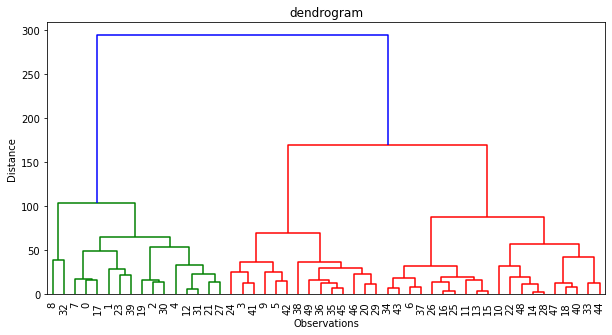

In [8]:
plt.figure(figsize=(10,5))
plt.title("dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10);

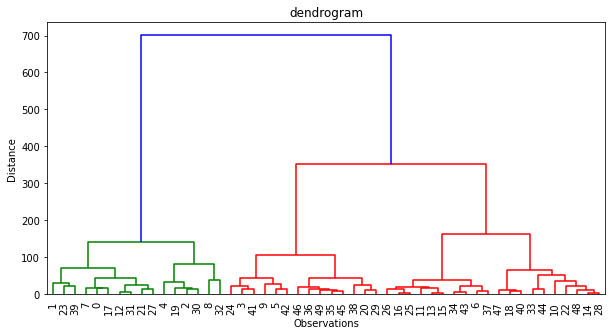

In [9]:
plt.figure(figsize=(10,5))
plt.title("dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
cluster.fit_predict(df)

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

In [21]:
print(cluster.labels_)

[1 1 1 2 1 2 0 1 1 2 0 0 1 0 0 0 0 1 0 1 2 1 0 1 2 0 0 1 0 2 1 1 1 0 0 2 2
 0 2 1 0 2 2 0 0 2 2 0 0 2]


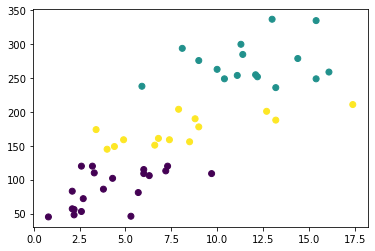

In [22]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_)

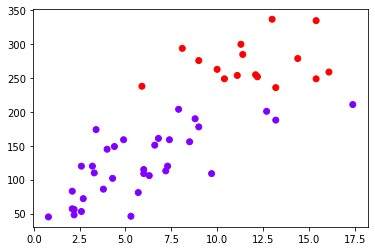

In [16]:
#cluster = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
#cluster.fit_predict(df)
#plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap="rainbow")

In [23]:
print(f'Silhouette Score(n=3): {silhouette_score(df, cluster.labels_)}')

Silhouette Score(n=3): 0.5319024108339817
